# ML Textual model Feature Engineering

In [346]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

# Importing libraries

In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV file using pandas dataframe

In [517]:
dataset = pd.read_csv("patient data all 119.csv")
dataset.head()

,seq_id,patient_id,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename,breathing_filename,finger_filename,patient_smartphone
0,649,NaN,13-Apr,negative,32,male,NaN,NaN,"Fever, chills, or sweating,",3908e5f2-4eb7-43f7-8230-00bf6216e333_158675905...,NaN,NaN,no
1,653,NaN,13-Apr,negative,31,male,NaN,NaN,"Fever, chills, or sweating,Shortness of breath...",3a4b7a0d-84af-4cdb-8a18-9b9b2a6cfab3_158675994...,NaN,NaN,no
2,654,NaN,13-Apr,negative,21,female,NaN,NaN,"New or worsening cough,",7a10c8b2-5716-4e28-82d0-a610399132dc_158676017...,NaN,NaN,no
3,655,NaN,13-Apr,negative,33,male,"Asthma or chronic lung disease,",NaN,"Fever, chills, or sweating,Shortness of breath...",58e53fe0-2adb-45cd-9d58-2572471d6871_158676036...,NaN,NaN,no
4,660,NaN,13-Apr,negative,27,male,Disease or conditions that make it harder to c...,NaN,"New or worsening cough,",1de242a7-1dc8-40d1-946d-07c5927a638c_158676152...,NaN,NaN,no


### Dropping unnecessary columns

In [518]:
df_clean = dataset.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])
df_clean.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,NaN,NaN,"Fever, chills, or sweating,"
1,negative,31,male,NaN,NaN,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,NaN,NaN,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",NaN,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,NaN,"New or worsening cough,"


### Counting number of nan values in each feature

In [519]:
ff = df_clean["medical_history"].isna().sum()
print(ff)

# Filling nan values with None.
df_clean["medical_history"].fillna("None,", inplace = True) 
df_clean["smoker"].fillna("no", inplace = True) 
df_clean["patient_reported_symptoms"].fillna("None,", inplace = True) 

3


In [520]:
df_clean.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,"None,",no,"Fever, chills, or sweating,"
1,negative,31,male,"None,",no,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,"None,",no,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",no,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,no,"New or worsening cough,"


In [521]:
# In order to see how many unique values are there in my column
df_clean["smoker"].describe()

count     118
unique      2
top        no
freq      107
Name: smoker, dtype: object

### Histogram

<Figure size 432x288 with 0 Axes>

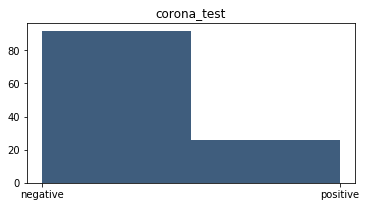

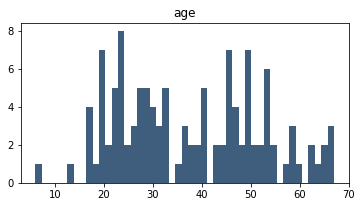

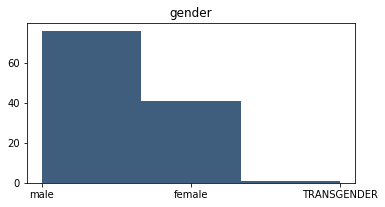

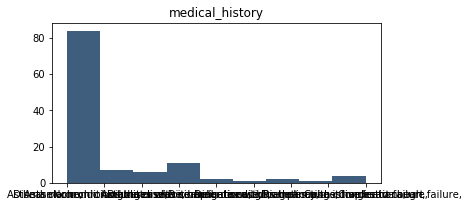

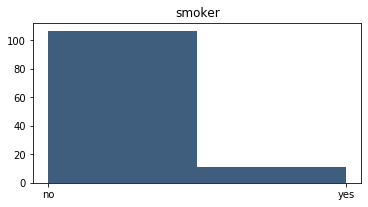

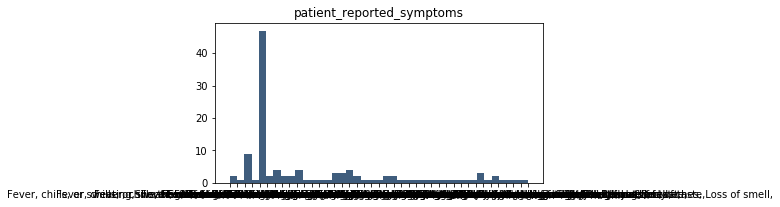

In [522]:
plt.suptitle("Histogram of Numerical Columns", fontsize = 20)
for i in range(1, df_clean.shape[1]+ 1): 
    plt.figure(figsize=(20,10))
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_clean.columns.values[i - 1])
    vals = np.size(df_clean.iloc[:, i - 1].unique())
    plt.hist(df_clean.iloc[:, i - 1], bins = vals, color = "#3F5D7D")

# Correlation

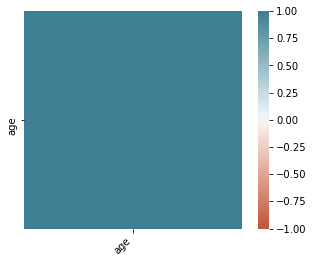

In [523]:
# df_clean.corrwith(df_clean.corona_test).plot.bar(figsize = (20, 10),
#                                                 title= "Correlation With Responsive Variable", 
#                                                 fontsize = 15, rot = 45,
#                                                 grid = True)
corr = df_clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Not working properly

In [556]:
# For checking the data type of all the features

df_clean.dtypes

corona_test                  object
age                           int64
gender                       object
medical_history              object
smoker                       object
patient_reported_symptoms    object
dtype: object

In [557]:
# For checking how many unique rows in medical history.
df_clean["medical_history"].unique()

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,',
       'Asthma or chronic lung disease,Disease or conditions that make it harder to cough,',
       'Asthma or chronic lung disease,Diabetes with complications,',
       'Pregnancy,',
       'Diabetes with complications,Congestive heart failure,',
       'Congestive heart failure,'], dtype=object)

In [558]:
# If the medial history doesnt contain "," at the end then add by runing below line. 

# df_clean["medical_history"] = df_clean.medical_history.astype(str) + ","

### reading csv containing important medical history diseases

In [559]:
top_medical_history = pd.read_csv("medical_history.csv").medical_history.values
top_medical_history

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,', 'Pregnancy,',
       'Congestive heart failure,', 'Extreme obesity'], dtype=object)

### doing feature engineering on medical history

In [614]:
df2 = df_clean.copy()
for mh in top_medical_history:
    df2[mh] = df2.medical_history.str.contains(mh).astype(int)
    df2["medical_history"] = df2.medical_history.str.replace(mh+ ",", "")

df2["total_diseases"] = df2.medical_history.str.count(",")
df2 = df2.drop(columns = ["medical_history", "patient_reported_symptoms"])


In [616]:
df2.head()


,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,total_diseases
0,negative,32,male,no,1,0,0,0,0,0,0,1
1,negative,31,male,no,1,0,0,0,0,0,0,1
2,negative,21,female,no,1,0,0,0,0,0,0,1
3,negative,33,male,no,0,1,0,0,0,0,0,1
4,negative,27,male,no,0,0,1,0,0,0,0,1


# Doing feature engineering on reported Symptoms

In [617]:
# For checking how many unique rows in patient_reported_symptoms.

# df_clean["patient_reported_symptoms"].unique()

In [618]:
# reading csv_file of patient recorded symptoms

top_symptoms = pd.read_csv("patient_reported_symptoms.csv").patient_reported_symptoms.values
top_symptoms

array(['Fever,', 'chills,', 'or sweating,', 'Shortness of breath',
       'Loss of taste,', 'Loss of smell,', 'New or worsening cough,',
       'Sore throat,', 'Body aches,', 'None,'], dtype=object)

#### Breaking every symptom into a feature

In [619]:
# Experiment

df3 = df_clean.copy()
for ps in top_symptoms:
    df3[ps] = df_clean.patient_reported_symptoms.str.contains(ps).astype(int)
    df3["patient_reported_symptoms"] = df_clean.patient_reported_symptoms.str.replace(ps+ ",", "")

df3["total symptoms"] = df_clean.patient_reported_symptoms.str.count(",")
df3 = df3.drop(columns = ["patient_reported_symptoms", "medical_history", "corona_test", "age", "gender", "smoker"])

df3.rename(columns={'None,':'Nothing'}, 
                 inplace=True)

In [620]:
df3.head()

,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing,total symptoms
0,1,1,1,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,1,1,1,0,0,0,7
4,0,0,0,0,0,0,1,0,0,0,1


##### Here we are merging the dataframes based on these features

In [621]:
df4 = pd.concat([df2, df3], axis=1, ignore_index=False)

In [622]:
df4.head()

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing,total symptoms
0,negative,32,male,no,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,3
1,negative,31,male,no,1,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,6
2,negative,21,female,no,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,negative,33,male,no,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,7
4,negative,27,male,no,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [623]:
len(df4)


118

In [624]:
# here you can drop total symptoms and total diseases column as well, in order to make your algo more robust. so i m gonna do 
# the same

df4 = df4.drop(columns = ["total_diseases", "total symptoms"])

In [625]:
df4.head()

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,negative,32,male,no,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,negative,31,male,no,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,negative,21,female,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,negative,33,male,no,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
4,negative,27,male,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [626]:
# for visualizing statistical detail of dataframe.

df4.describe()

,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,37.677966,0.711864,0.084746,0.067797,0.110169,0.016949,0.042373,0.0,0.245763,0.245763,0.245763,0.313559,0.177966,0.084746,0.381356,0.296610,0.110169,0.398305
std,14.503687,0.454826,0.279691,0.252469,0.314436,0.129631,0.202297,0.0,0.432374,0.432374,0.432374,0.465918,0.384115,0.279691,0.487791,0.458711,0.314436,0.491637
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [627]:
# For checking how many columns are there in the final dataframe, This will make sure that none is repeating. 

df4.dtypes

corona_test                                            object
age                                                     int64
gender                                                 object
smoker                                                 object
None,                                                   int32
Asthma or chronic lung disease,                         int32
Disease or conditions that make it harder to cough,     int32
Diabetes with complications,                            int32
Pregnancy,                                              int32
Congestive heart failure,                               int32
Extreme obesity                                         int32
Fever,                                                  int32
chills,                                                 int32
or sweating,                                            int32
Shortness of breath                                     int32
Loss of taste,                                          int32
Loss of 

In [629]:
# DO upsampling or down sampling

df4["corona_test"].head(200)

0      negative
1      negative
2      negative
3      negative
4      negative
         ...   
113    positive
114    negative
115    negative
116    negative
117    negative
Name: corona_test, Length: 118, dtype: object

In [ ]:

# Split data into training, val and test sets
# TODO

# Build a Model 

# SVM
# TODO

# Random Forest
# TODO

# XGboost
# TODO
